**Google Colab ... for Data Science**

Cleaning and treatment of an .csv

This plataform alows me to work with other people for cleaning and search for data in real time. Also all the files that are involved in the projetcs are loaded in the cloud, so anyone with acces can work in diffrent places


Importo las librerias


In [ ]:
import pandas as pd
import numpy as np

* Accedo a un drive con documentos compartidos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Conecto el archivo con una ruta que pueda leer Pandas


In [ ]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Archivos para montar/2023_vehicular_traffic.csv'

* Cargo el archivo a un DataFrame creado con Pandas para poder manipularlo

In [ ]:
df = pd.read_csv(ruta)

* Extraccion de primera informacion clave a tener encuenta. Cuantas entradas hay, cuales son mis columnas, que tipos de datos tienen. Imprimo las primeras o las últimas entradas


In [ ]:
df.info()
df.describe()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534571 entries, 0 to 534570
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MES         534571 non-null  int64 
 1   DIA         534571 non-null  int64 
 2   HORA        534571 non-null  int64 
 3   ID_PEAJE    534571 non-null  object
 4   SENTIDO     534571 non-null  object
 5   TIPO_COBRO  534571 non-null  object
 6   PASOS       534571 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 28.5+ MB


,MES,DIA,HORA,ID_PEAJE,SENTIDO,TIPO_COBRO,PASOS
534566,12,31,23,SAR,Provincia,Tag,13
534567,12,31,23,PB3,Provincia,Violación,2
534568,12,31,23,PB4,Centro,Violación,7
534569,12,31,23,SAR,Provincia,Violación,6
534570,12,31,23,PB1,Provincia,Tag,1


* A traves de Pandas busco si hay algún dato tuplicado que sea necesario eliminar. Imprimo los duplicados si los hubiera

In [ ]:
duplicados = df.duplicated()
df[duplicados]

,MES,DIA,HORA,ID_PEAJE,SENTIDO,TIPO_COBRO,PASOS


* A traves de Pandas busco si hay algún dato nulo que sea necesario eliminar.

In [ ]:
df.isnull().sum()

,0
MES,0
DIA,0
HORA,0
ID_PEAJE,0
SENTIDO,0
TIPO_COBRO,0
PASOS,0


* Imprimo los nulos que pudiera haber para decidir que hacer

In [ ]:
df[df.isnull().any(axis=1)]

,MES,DIA,HORA,ID_PEAJE,SENTIDO,TIPO_COBRO,PASOS


* Visualizacion de aquellas columnas string de categoria, para saber cuantos unicos hay, y si hay errores en ellas. Luego decidir

In [ ]:
df['SENTIDO'].unique()
df['SENTIDO'].value_counts()

,count
SENTIDO,
Provincia,300100
Centro,234470
Provincia,1


* Si tengo que limpiar errores, como espacios al comienzo o al final, opero con la columna

In [ ]:
df['SENTIDO'] = df['SENTIDO'].str.strip()

* Corroboro la limpieza

In [ ]:
df['SENTIDO'].unique()
df['SENTIDO'].value_counts()

,count
SENTIDO,
Provincia,300101
Centro,234470


In [ ]:
df['TIPO_COBRO'].unique()
df['TIPO_COBRO'].value_counts()

,count
TIPO_COBRO,
Tag,130127
Violación,129394
Mercado Pago,124278
Efectivo,40051
Exento,39874
Rec.Deuda,37144
Tarjeta Magnética,14633
N/D,8690
REC DEUDA,5176


* Con la limpieza corroborada guardo en el Drive o en la Unidad

In [ ]:
ruta_guardado ='/content/drive/MyDrive/peajes_buenos_aires_limpio.csv'
df.to_csv(ruta_guardado, index=False)

from google.colab import files
df.to_csv('peajes_limpio.csv', index=False)
files.download('peajes_limpio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este proyecto explora y limpia un conjunto de datos de tránsito proveniente de peajes de Buenos Aires. A través de Python y Google Colab, se realizó la depuración del archivo original (detección de nulos, valores inconsistentes, duplicados y errores de formato). Una vez estructurado el dataset, se llevaron a cabo visualizaciones exploratorias para identificar patrones temporales, distribuciones de medios de pago y comportamiento según peajes.

* Importar librerias para visualizaciones


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

* El siguiente ploteo de barras cuenta la frecuencia de entrada de cada categoria. No vincula con el condenido de otra columna

<ipython-input-15-3127008236>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['ID_PEAJE'].value_counts().index,


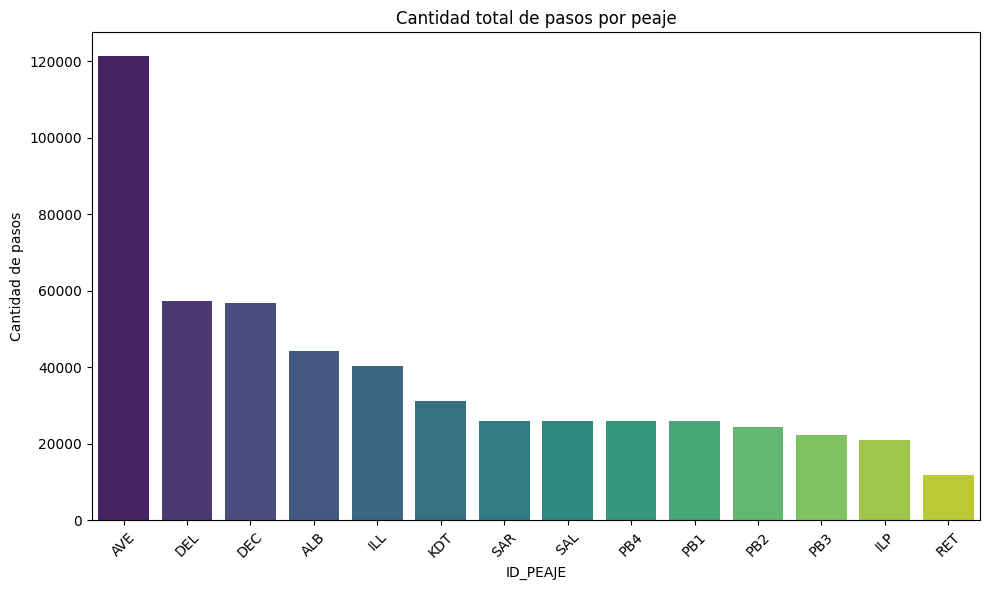

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['ID_PEAJE'].value_counts().index,
            y=df['ID_PEAJE'].value_counts().values,
            palette='viridis')
plt.title('Cantidad total de pasos por peaje')
plt.xlabel('ID_PEAJE')
plt.ylabel('Cantidad de pasos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Para observar la suma de otra columna, de cada categoria, hay que agrupar por categoria en un df aparte, y luego hacer la suma con otros codigos


In [ ]:
pasos_por_peaje = df.groupby('ID_PEAJE')['PASOS'].sum().sort_values(ascending=False)

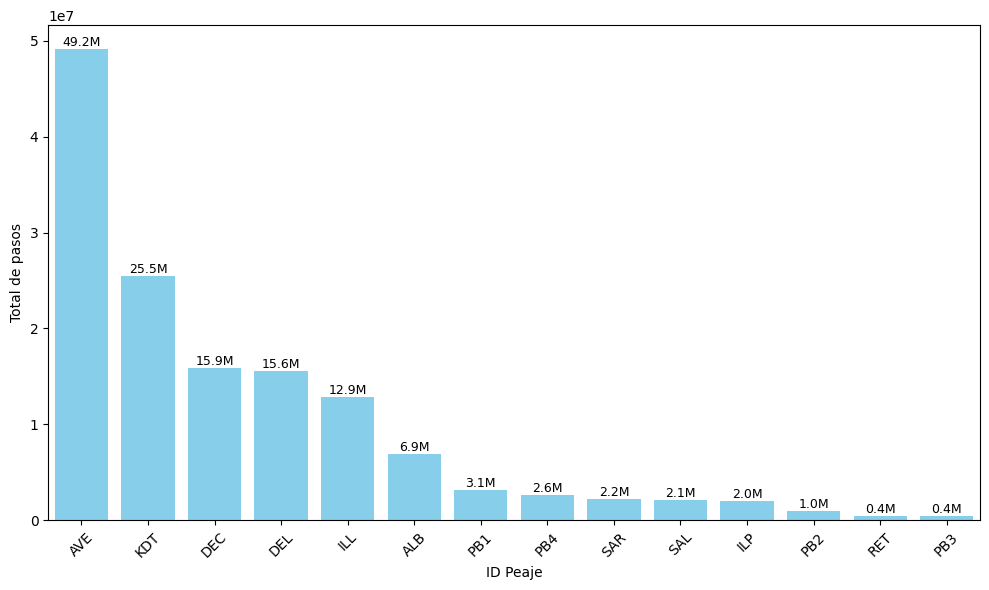

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pasos_por_peaje.plot(kind ='bar', color='skyblue')

bars = plt.bar(pasos_por_peaje.index, pasos_por_peaje.values, color='skyblue')

plt.xlabel('ID Peaje')
plt.ylabel('Total de pasos')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    # Mostrar en millones (redondeado a 1 decimal)
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height/1e6:.1f}M',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#* Agrupar por horas

Obtencion de horas pico

In [ ]:
pasos_por_hora = df.groupby('HORA')['PASOS'].sum().sort_index()

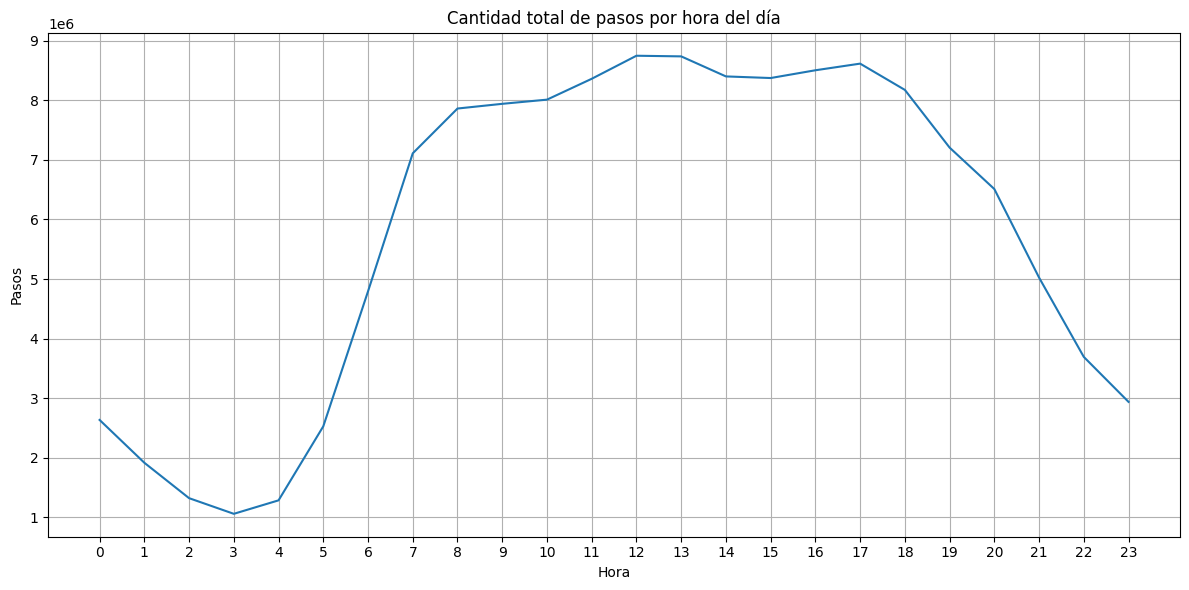

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=pasos_por_hora.index, y=pasos_por_hora.values)
plt.title('Cantidad total de pasos por hora del día')
plt.xlabel('Hora')
plt.ylabel('Pasos')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

*Agrupamiento por Peaje y hora, sumando la cantidad de pasos. Entrega un data frame de tres columnas


In [ ]:
pasos_por_hora_y_peaje = df.groupby(['ID_PEAJE', 'HORA'])['PASOS'].sum().reset_index()

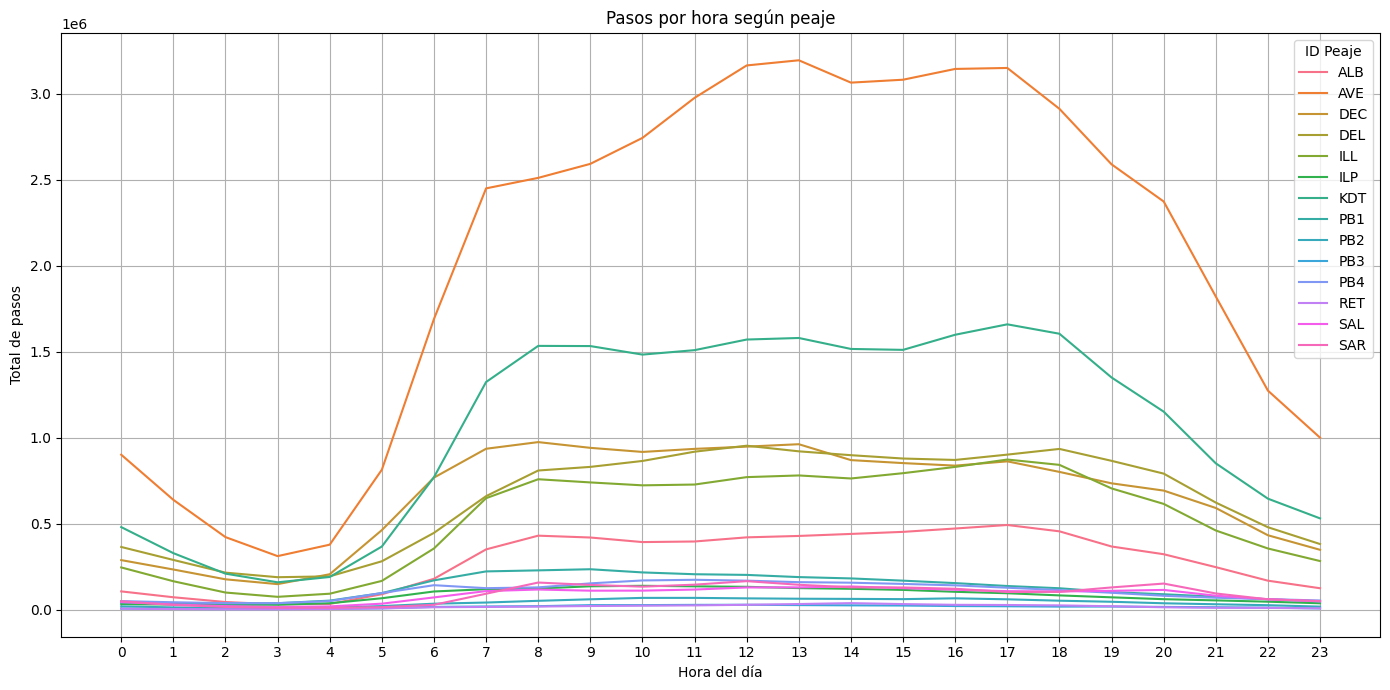

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=pasos_por_hora_y_peaje, x='HORA', y='PASOS', hue='ID_PEAJE')

plt.title('Pasos por hora según peaje')
plt.xlabel('Hora del día')
plt.ylabel('Total de pasos')
plt.xticks(range(0, 24))
plt.legend(title='ID Peaje')
plt.grid(True)
plt.tight_layout()
plt.show()

“A través del análisis de pasos por hora agrupados por ID de peaje, detecté distintos patrones de comportamiento. Algunos peajes presentan curvas horarias muy pronunciadas, con picos de tránsito claros en ciertas franjas horarias (horas pico), mientras que otros mantienen un flujo más uniforme durante todo el día. Esto permitió segmentar los peajes según su patrón de uso y sugiere posibles diferencias de localización o funcionalidad.”

In [ ]:
rango_por_peaje = pasos_por_hora_y_peaje.groupby('ID_PEAJE')['PASOS'].agg(['min', 'max'])
rango_por_peaje['rango'] = rango_por_peaje['max'] - rango_por_peaje['min']
rango_por_peaje = rango_por_peaje.sort_values(by='rango', ascending=False)

In [ ]:
top_3_rango_alto = rango_por_peaje.head(3).index
top_3_rango_bajo = rango_por_peaje.tail(3).index

In [ ]:
df_filtrado = pasos_por_hora_y_peaje[pasos_por_hora_y_peaje['ID_PEAJE'].isin(top_3_rango_alto.union(top_3_rango_bajo))]

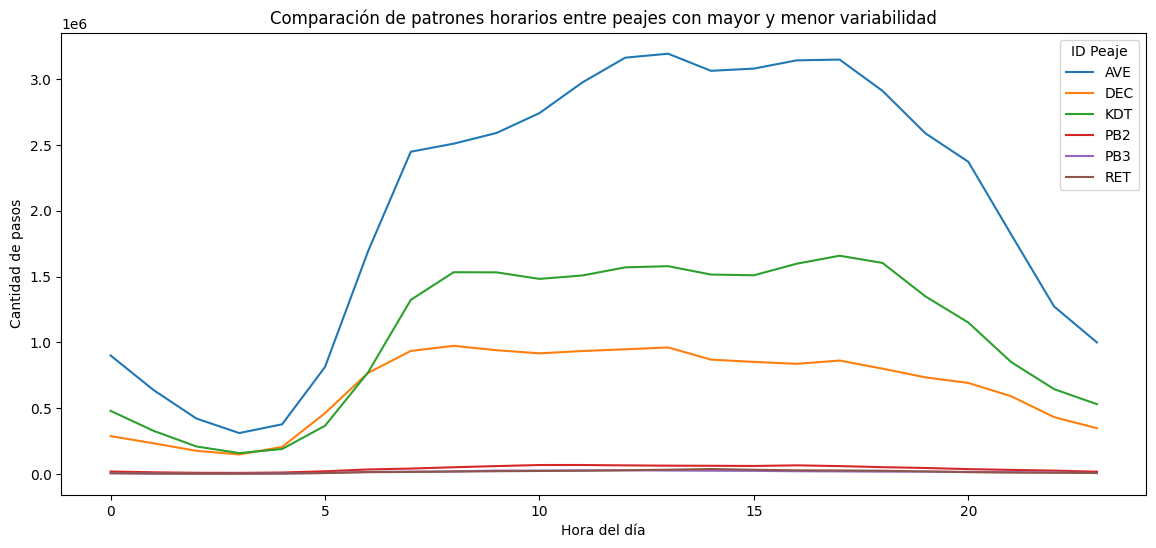

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_filtrado, x='HORA', y='PASOS', hue='ID_PEAJE')
plt.title('Comparación de patrones horarios entre peajes con mayor y menor variabilidad')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pasos')
plt.legend(title='ID Peaje')
plt.show()

A partir del análisis de registros horarios de tránsito en los peajes de Buenos Aires, se clasificaron los peajes según su variabilidad horaria.
Para ello se calculó el rango entre la cantidad máxima y mínima de pasos por hora registrados en cada peaje a lo largo del día.

El gráfico permite observar con claridad que algunos peajes presentan un rango amplio entre sus momentos de menor y mayor circulación, reflejando un patrón típico de hora pico, con flujos concentrados en horarios específicos (como ingreso o egreso laboral).
Por el contrario, otros peajes mantienen una distribución más estable a lo largo del día, sin picos marcados, lo que puede responder a flujos constantes (como tránsito interurbano o zonas de baja densidad).

Esta comparación permite distinguir comportamientos operativos heterogéneos entre peajes, lo cual es útil para ajustar políticas de gestión de tráfico o mantenimiento según la variación horaria esperada.


# DISTRIBUCION DE MEDIOS DE PAGO

Totales de entrada por cobro

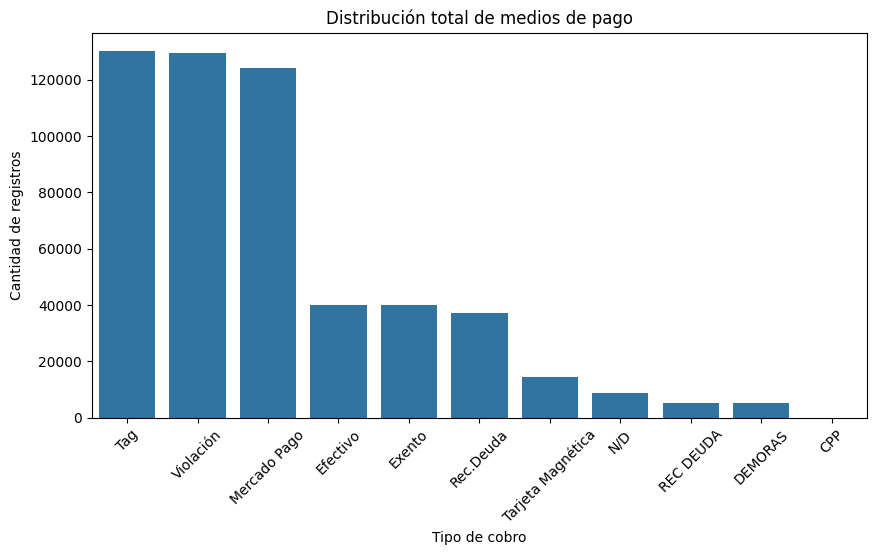

In [ ]:
plt.figure(figsize=(10,5))
tipo_cobro_total = df['TIPO_COBRO'].value_counts()
sns.barplot(x=tipo_cobro_total.index, y=tipo_cobro_total.values)
plt.title('Distribución total de medios de pago')
plt.xlabel('Tipo de cobro')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.show()

Totales de Medios de cobro por peaje

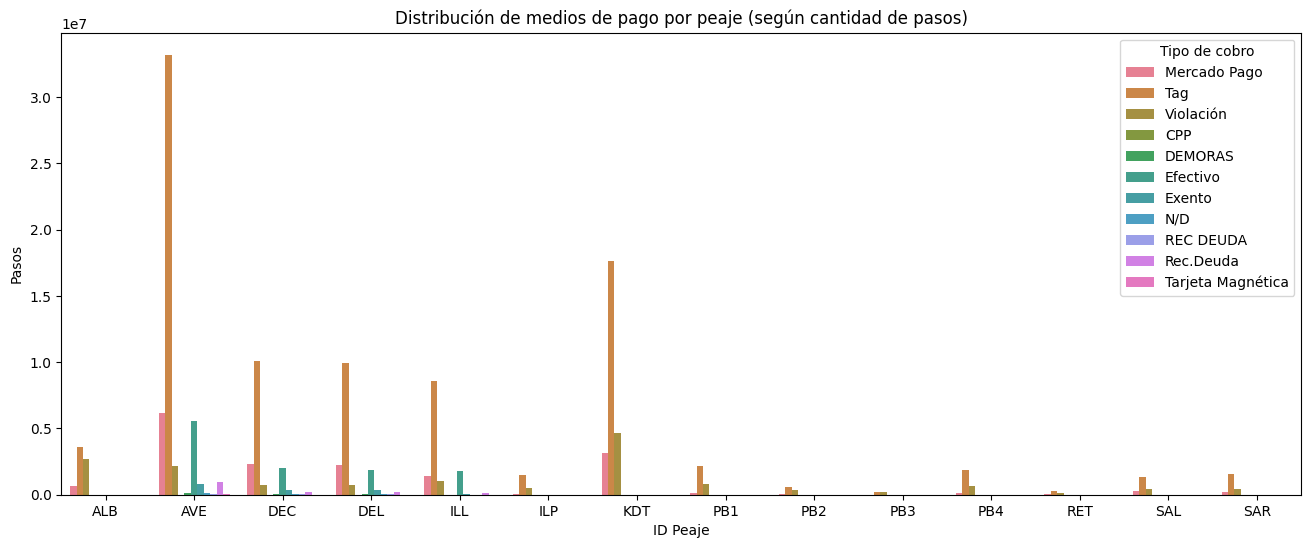

In [ ]:
pasos_por_cobro_y_peaje = df.groupby(['ID_PEAJE', 'TIPO_COBRO'])['PASOS'].sum().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(data=pasos_por_cobro_y_peaje, x='ID_PEAJE', y='PASOS', hue='TIPO_COBRO')
plt.title('Distribución de medios de pago por peaje (según cantidad de pasos)')
plt.xlabel('ID Peaje')
plt.ylabel('Pasos')
plt.legend(title='Tipo de cobro')
plt.show()

En este proyecto fueron tomados datos crudos de un Csv de fuente abierta. Para trabajarlo se utilizó Python desde GoogleColab como entorno colaborativo y en tiempo real.

Una vez dentro del cuaderno fue necesario conectar con Drive, a partir de allí se cargo el csv a un DataFrame que será utilizado y manipulado con Pandas. Con el DataFrame se procedio a buscar duplicados, revisar los tipos de datos, buscar valores nulos, y hacer limpiezas en categorias.

Ademas se crearon nuevos dataframe con condiciones de agrupamiento para hacer graficos de primera visualizacion mas precisos.
Con los gráficos de primera visualizacion se observaron algunos patrones dentro de las categorias que guian proximas busquedas con nuevas herramientas